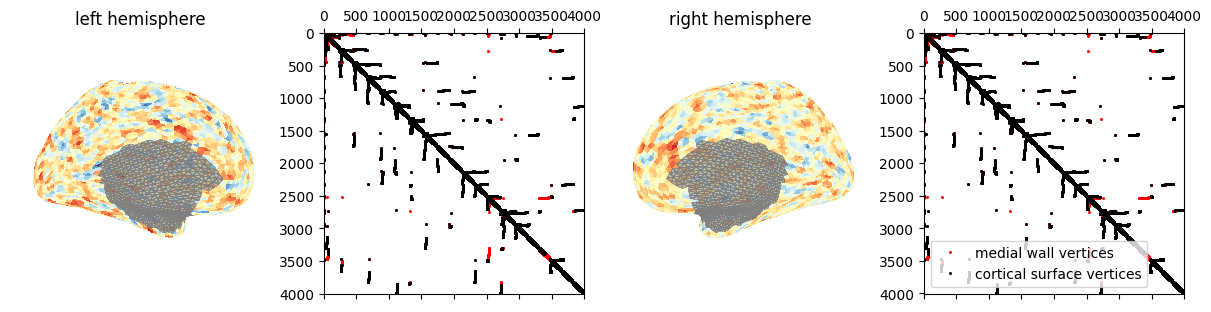

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nilearn.plotting import plot_surf

from compare_brain_maps.utils import Surface

n_vertices = 4002
data = {"left": np.random.randn(n_vertices), "right": np.random.randn(n_vertices)}
X = Surface(data, atlas="fsLR", density="4k", surface="inflated", mask_medial=False)
X_masked = Surface(data, atlas="fsLR", density="4k", surface="inflated", mask_medial=True)
A, A_masked = X.get_adjacency(), X_masked.get_adjacency()

# plot mask of the medial wall, and adjacency matrix
fig = plt.figure(figsize=(12, 3), layout="constrained")
axs = [
    fig.add_subplot(1, 4, 1, projection="3d"),
    fig.add_subplot(1, 4, 2),
    fig.add_subplot(1, 4, 3, projection="3d"),
    fig.add_subplot(1, 4, 4),
]
plot_surf_kwargs = dict(surf_map=X_masked, view="medial", cmap="RdYlBu", colorbar=False, darkness=None)
_ = plot_surf(title="left hemisphere", hemi="left", axes=axs[0], **plot_surf_kwargs)
axs[1].spy(A["left"], c="r", ms=1)
axs[1].spy(A_masked["left"], c="k", ms=1)
_ = plot_surf(title="right hemisphere", hemi="right", axes=axs[2], **plot_surf_kwargs)
axs[3].spy(A["right"], c="r", ms=1, label="medial wall vertices")
axs[3].spy(A_masked["right"], c="k", ms=1, label="cortical surface vertices")
axs[3].legend()